# Sales Data Analysis

Project: Sales Data Analysis (Jupyter Notebook)

Description: Clean, explore and visualize a company's monthly sales to identify top products, trends, and customer behavior. This notebook uses a synthetic sample dataset so you can run it immediately. Replace the data section with your own CSV (superstore.csv) if available.

Skills: Python, Pandas, NumPy, Matplotlib, EDA, data cleaning, aggregation, pivot tables

In [9]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

np.random.seed(42)

# Generate synthetic sales data (1000 rows)
n = 1000
start = datetime(2023,1,1)
dates = [start + timedelta(days=int(x)) for x in np.random.randint(0, 730, size=n)]
products = ['Product ' + str(i) for i in np.random.choice(range(1,31), size=n)]
categories = np.random.choice(['Office Supplies','Technology','Furniture'], size=n, p=[0.5,0.3,0.2])
subcats_map = {
    'Office Supplies': ['Paper','Binders','Pens'],
    'Technology': ['Phones','Accessories','Computers'],
    'Furniture': ['Chairs','Tables','Bookcases']
}
subcats = [np.random.choice(subcats_map[c]) for c in categories]
sales = np.round(np.random.exponential(scale=120, size=n) + np.random.randint(5,500,size=n),2)
quantity = np.random.poisson(lam=2, size=n) + 1
discount = np.round(np.random.choice([0.0,0.05,0.1,0.15,0.2], size=n, p=[0.5,0.2,0.15,0.1,0.05]),2)
profit = np.round(sales * (0.1 + np.random.normal(0.12, 0.07, size=n)) - discount*20,2)
regions = np.random.choice(['East','West','South','Central'], size=n)
order_ids = ['ORD' + str(10000+i) for i in range(n)]
customer_ids = ['CUST' + str(np.random.randint(1000,2000)) for _ in range(n)]

df = pd.DataFrame({
    'OrderID': order_ids,
    'OrderDate': dates,
    'Product': products,
    'Category': categories,
    'Sub-Category': subcats,
    'Sales': sales,
    'Quantity': quantity,
    'Discount': discount,
    'Profit': profit,
    'Region': regions,
    'CustomerID': customer_ids
})

# Save sample CSV for quick reuse
df.to_csv('sales_data_analysis_notebook.csv', index=False)
print('sales_data_analysis_notebook.csv')

df.head()

sales_data_analysis_notebook.csv


,OrderID,OrderDate,Product,Category,Sub-Category,Sales,Quantity,Discount,Profit,Region,CustomerID
0,ORD10000,2023-04-13,Product 9,Office Supplies,Paper,536.10,1,0.00,48.55,West,CUST1321
1,ORD10001,2024-03-11,Product 17,Office Supplies,Binders,126.86,4,0.00,25.43,East,CUST1806
2,ORD10002,2023-09-28,Product 9,Office Supplies,Paper,488.32,2,0.00,107.49,East,CUST1240
3,ORD10003,2023-04-17,Product 11,Office Supplies,Binders,234.22,1,0.00,22.04,West,CUST1017
4,ORD10004,2023-03-13,Product 15,Office Supplies,Pens,275.04,2,0.05,50.73,West,CUST1767


In [2]:
print('Rows, Columns:', df.shape)
print('\nMissing values:\n', df.isnull().sum())
print('\nData types:\n', df.dtypes)

Rows, Columns: (1000, 11)

Missing values:
 OrderID         0
OrderDate       0
Product         0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
Region          0
CustomerID      0
dtype: int64

Data types:
 OrderID                 object
OrderDate       datetime64[ns]
Product                 object
Category                object
Sub-Category            object
Sales                  float64
Quantity                 int32
Discount               float64
Profit                 float64
Region                  object
CustomerID              object
dtype: object


In [3]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['Year'] = df['OrderDate'].dt.year
df['Month'] = df['OrderDate'].dt.to_period('M')
df['AvgPrice'] = (df['Sales'] / df['Quantity']).round(2)
print(df[['Sales','Quantity','Profit','Discount','AvgPrice']].describe())

            Sales    Quantity      Profit     Discount     AvgPrice
count  1000.00000  1000.00000  1000.00000  1000.000000  1000.000000
mean    377.52677     2.95400    82.41062     0.052550   167.318370
std     181.25361     1.42896    50.26527     0.061805   132.848448
min      16.40000     1.00000    -5.90000     0.000000     5.470000
25%     236.13250     2.00000    43.18500     0.000000    78.000000
50%     384.56500     3.00000    77.13500     0.050000   130.350000
75%     495.56000     4.00000   113.29500     0.100000   209.025000
max    1264.14000     8.00000   295.98000     0.200000   789.910000


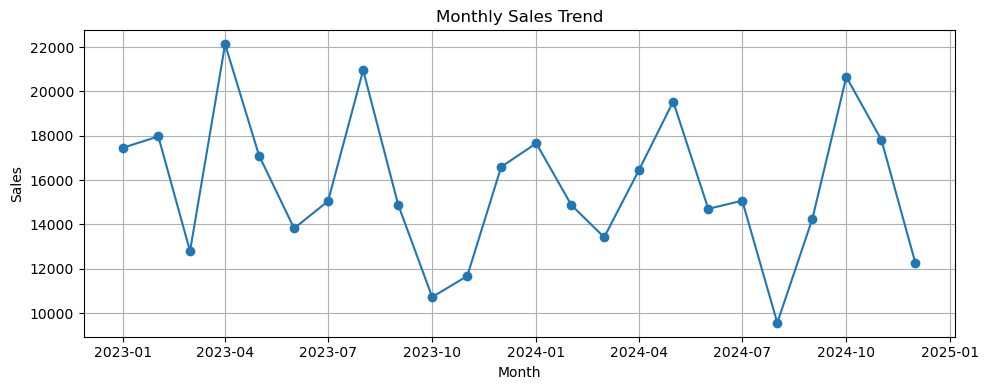

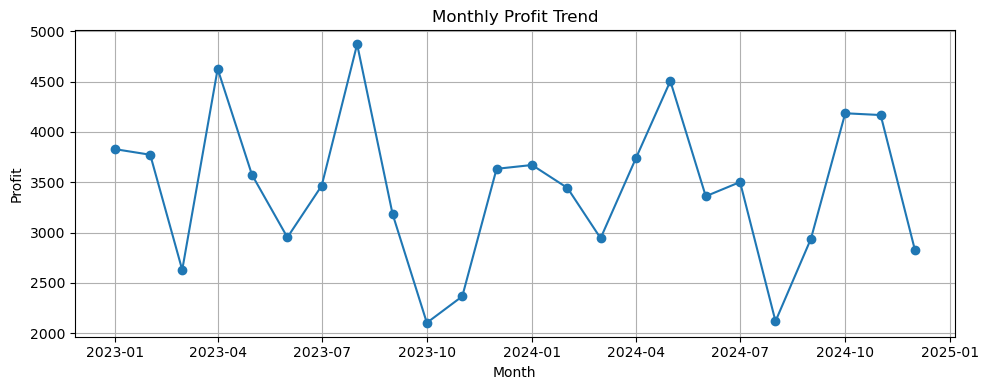

In [4]:
monthly = df.groupby('Month').agg({'Sales':'sum','Profit':'sum'}).reset_index()
monthly['Month'] = monthly['Month'].dt.to_timestamp()

plt.figure(figsize=(10,4))
plt.plot(monthly['Month'], monthly['Sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(monthly['Month'], monthly['Profit'], marker='o')
plt.title('Monthly Profit Trend')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

Top 10 products by Sales:
                Sales  Quantity
Product                       
Product 29  17162.75       116
Product 17  16674.12       139
Product 27  16320.13       122
Product 15  16033.68       109
Product 2   15735.10       111
Product 8   15577.17       110
Product 23  14461.62       100
Product 5   14256.81       119
Product 25  13677.59        97
Product 12  13056.86        96


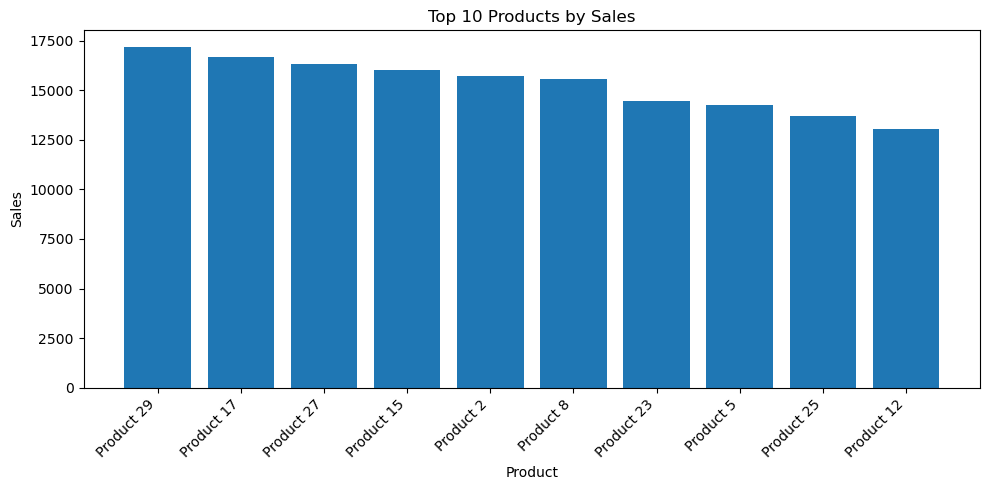


Category sales share:
                      Sales
Category                  
Office Supplies  192464.66
Technology       118944.42
Furniture         66117.69


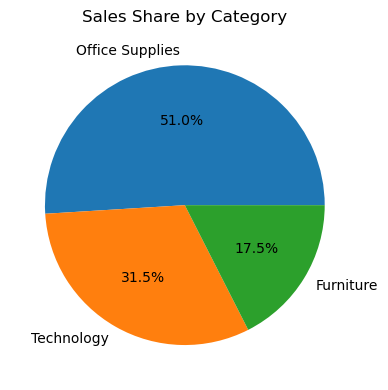

In [5]:
top_products = df.groupby('Product').agg({'Sales':'sum','Quantity':'sum'}).sort_values('Sales', ascending=False).head(10)
print('Top 10 products by Sales:\n', top_products)

plt.figure(figsize=(10,5))
plt.bar(top_products.index, top_products['Sales'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

cat_share = df.groupby('Category').agg({'Sales':'sum'}).sort_values('Sales', ascending=False)
print('\nCategory sales share:\n', cat_share)
plt.figure(figsize=(6,4))
plt.pie(cat_share['Sales'], labels=cat_share.index, autopct='%1.1f%%')
plt.title('Sales Share by Category')
plt.tight_layout()
plt.show()

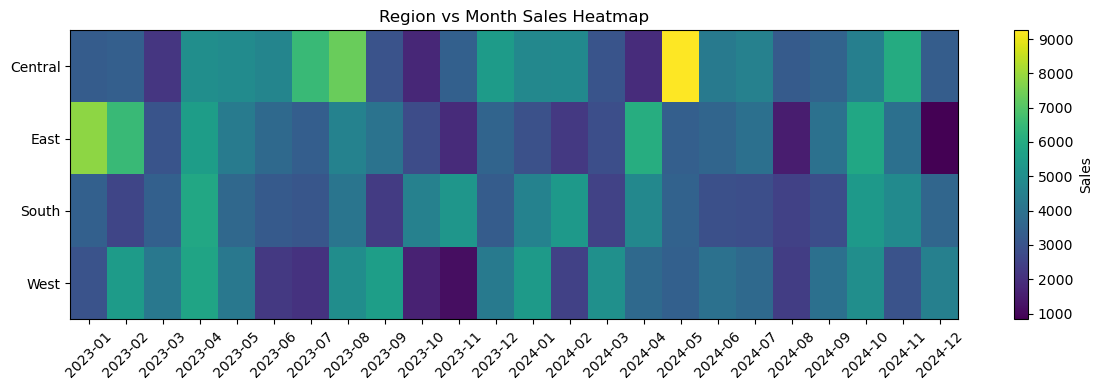

In [6]:
pivot = df.pivot_table(index='Region', columns=df['Month'].dt.to_timestamp(), values='Sales', aggfunc='sum').fillna(0)

plt.figure(figsize=(12,4))
plt.imshow(pivot, aspect='auto')
plt.yticks(range(len(pivot.index)), pivot.index)
plt.xticks(range(len(pivot.columns)), [c.strftime('%Y-%m') for c in pivot.columns], rotation=45)
plt.colorbar(label='Sales')
plt.title('Region vs Month Sales Heatmap')
plt.tight_layout()
plt.show()

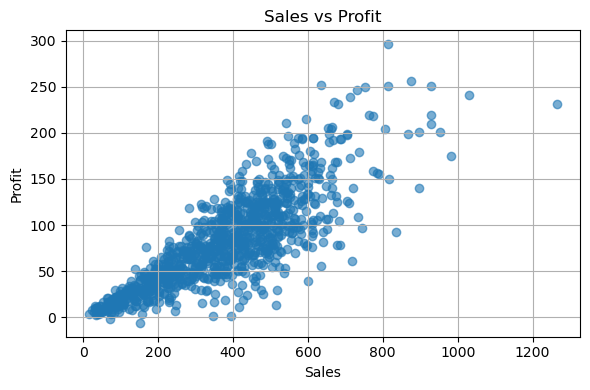

In [7]:
plt.figure(figsize=(6,4))
plt.scatter(df['Sales'], df['Profit'], alpha=0.6)
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
cleaned_path = 'sales_data_analysis_notebook.csv'
df.to_csv(cleaned_path, index=False)
print('Cleaned data saved to', cleaned_path)

project_summary = {
    'title': 'Sales Data Analysis',
    'description': 'Exploratory data analysis on sales transactions to identify top products, monthly trends, and regional performance.',
    'skills': ['Python','Pandas','NumPy','Matplotlib','EDA','Data Cleaning','Aggregation','Pivot Tables'],
    'dataset_sample_path': '/mnt/data/sales_sample.csv',
    'cleaned_data_path': cleaned_path
}
project_summary

Cleaned data saved to sales_data_analysis_notebook.csv


{'title': 'Sales Data Analysis',
 'description': 'Exploratory data analysis on sales transactions to identify top products, monthly trends, and regional performance.',
 'skills': ['Python',
  'Pandas',
  'NumPy',
  'Matplotlib',
  'EDA',
  'Data Cleaning',
  'Aggregation',
  'Pivot Tables'],
 'dataset_sample_path': '/mnt/data/sales_sample.csv',
 'cleaned_data_path': 'sales_data_analysis_notebook.csv'}

## Resume bullet points (copy-paste)

- Performed exploratory data analysis on 1,000+ sales transactions using Python (Pandas, NumPy, Matplotlib), identifying monthly sales trends and regional performance.
- Identified top 10 products by revenue and created visual dashboards to support inventory and marketing decisions.
- Built pivot tables and heatmaps to analyze region vs month sales performance and provided actionable insights to improve underperforming regions.
- Cleaned and enriched raw data (created AvgPrice, Year, Month features) and saved cleaned dataset for downstream analysis.

---

## How to use this notebook with your own data
1. Replace the synthetic data block with df = pd.read_csv('your_superstore.csv').
2. Ensure OrderDate is parsed: df['OrderDate'] = pd.to_datetime(df['OrderDate']).
3. Run all cells to reproduce analysis and charts.